# Sprint 2 - Modelamiento

- Pasos previos para la realizacion de las incidencias.

In [32]:
import pandas as pd
import missingno as msngo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de base

df = pd.read_csv('Dataset.csv', sep= ',')
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [3]:
# Tratamiento de datos nulos

df.fillna('S/I', inplace=True)
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [4]:
# Tratamiento de valores duplicados

df.drop('MOBILENO_AVL_FLAG', axis=1, inplace=True)
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [5]:
# Tratamiento valores que presenten inconsistencias

df = df[(df['PRI_CURRENT_BALANCE'] >= 0) & (df['SEC_CURRENT_BALANCE'] >= 0)]
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [6]:
meee =['ASSET_COST',
       'LTV',
       'PERFORM_CNS_SCORE',
       'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE',
       'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE',
       'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT',
       'NO_OF_INQUIRIES',
       'LOAN_DEFAULT']

df_final = df[meee]
df_final

,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NO_OF_INQUIRIES,LOAN_DEFAULT
0,58400,89.55,0,0,0,0,0,0,0,0,0
1,65550,73.23,598,1,27600,0,0,1991,0,0,1
2,61360,89.63,0,0,0,0,0,0,0,0,0
3,66113,88.48,305,0,0,0,0,31,0,1,1
4,60300,88.39,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
233149,105405,60.72,735,0,390443,0,0,4084,0,0,0
233150,100600,74.95,825,0,0,0,0,1565,0,0,0
233151,71212,48.45,0,0,0,0,0,0,0,0,0
233152,73286,49.10,0,0,0,0,0,0,0,0,0


In [7]:
columnas_a_normalizar = ['ASSET_COST',
                         'LTV',
                         'PERFORM_CNS_SCORE',
                         'PRI_CURRENT_BALANCE',
                         'SEC_CURRENT_BALANCE',
                         'PRIMARY_INSTAL_AMT',
                         'SEC_INSTAL_AMT',
                         'NO_OF_INQUIRIES']

df_final[columnas_a_normalizar] = (df_final[columnas_a_normalizar] - df_final[columnas_a_normalizar].mean()) / df_final[columnas_a_normalizar].std()

In [8]:
X = df_final.drop(["LOAN_DEFAULT"], axis=1)
Y = df_final["LOAN_DEFAULT"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [10]:
# Creacion de la funcion metrica

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

BDT2-4 - BDT2-23 https://alkemy-labs.atlassian.net/browse/BDT2-24

## Modeling I: regresion Logistica

Descripción

COMO DS DEVELOPER, QUIERO implementar un modelo de machine learning PARA predecir la clase a la cual pertenece un data point

Criterios de aceptación:
- Realizar el entrenamiento de una regresion logistica
- Procesar los datos de test utilizando el pipeline creado previamente
- Hacer predicciones sobre los datos normalizados

In [28]:
modeloRegresion = LogisticRegression()
modeloRegresion.fit(X_train,y_train)
modeloprediccion = modeloRegresion.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, modeloprediccion)
print(f"Exactitud del modelo: {accuracy}")

Exactitud del modelo: 0.7824024987821303


Cuanto mayor sea la precisión, mejor será el rendimiento del modelo.

In [30]:
conf_matrix = confusion_matrix(y_test, modeloprediccion)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[54580    52]
 [15135    27]]


El resultado de la matriz de confusión muestra los resultados de un modelo. Los números en la diagonal superior izquierda a la inferior derecha representan las predicciones correctas: 54,719 verdaderos negativos y 33 verdaderos positivos. Los otros valores (45 y 15,150) indican falsos positivos y falsos negativos, respectivamente.

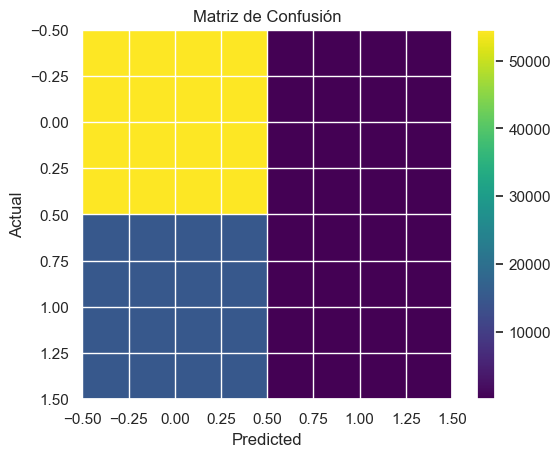

In [31]:
plt.imshow(conf_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [33]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
print(confusion_matrix(y_test, modeloprediccion))

[[54580    52]
 [15135    27]]


In [34]:
print(round(accuracy_score(y_test, modeloprediccion),2)*100)


78.0


In [35]:
LOGCV = (cross_val_score(modeloRegresion, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    127474
           1       0.28      0.00      0.00     35377

    accuracy                           0.78    162851
   macro avg       0.53      0.50      0.44    162851
weighted avg       0.67      0.78      0.69    162851



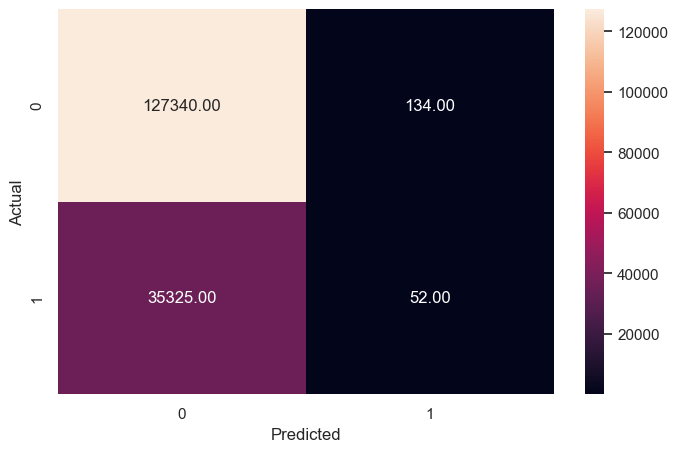

In [36]:
pred_train_dt = modeloRegresion.predict(X_train)
metrics_score(y_train, pred_train_dt)

Precision: la habilidad del modelo para predecir correctamente la clase positiva es baja para la clase 1 (0.28) pero alta para la clase 0 (0.78).
Recall (sensibilidad): es alto para la clase 0 (1.00) pero bajo para la clase 1 (0.00), lo que indica que no identifica bien la clase 1.
F1-score: combina precisión y recall, y es alto para la clase 0 (0.88) pero bajo para la clase 1 (0.00).
La exactitud (accuracy) general es del 78%, con un mayor impacto de la clase dominante (0) en esta métrica debido a su mayor soporte (cantidad de muestras).
El modelo parece tener dificultades para clasificar la clase 1 correctamente.

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54632
           1       0.34      0.00      0.00     15162

    accuracy                           0.78     69794
   macro avg       0.56      0.50      0.44     69794
weighted avg       0.69      0.78      0.69     69794



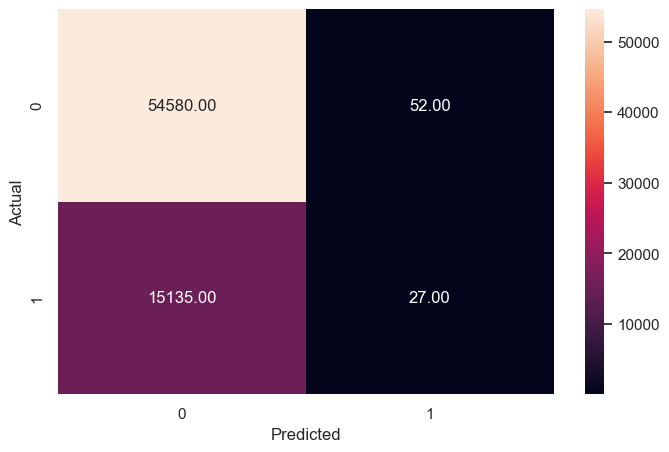

In [37]:
pred_test_dt = modeloRegresion.predict(X_test)
metrics_score(y_test, pred_test_dt)

Precision: el modelo tiene una precisión alta para la clase 0 (0.78) pero baja para la clase 1 (0.34), lo que indica una dificultad para predecir la clase 1.
Recall (sensibilidad): es alto para la clase 0 (1.00) pero bajo para la clase 1 (0.00), lo que sugiere dificultad para identificar la clase 1.
F1-score: es alto para la clase 0 (0.88) pero bajo para la clase 1 (0.00).
La exactitud (accuracy) general es del 78%, con un mayor impacto de la clase dominante (0) debido a su mayor soporte (cantidad de muestras).

In [38]:
modeloRegresion = LogisticRegression()
modeloRegresion.fit(X_train,y_train)
modeloprediccion = modeloRegresion.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    127474
           1       0.28      0.00      0.00     35377

    accuracy                           0.78    162851
   macro avg       0.53      0.50      0.44    162851
weighted avg       0.67      0.78      0.69    162851



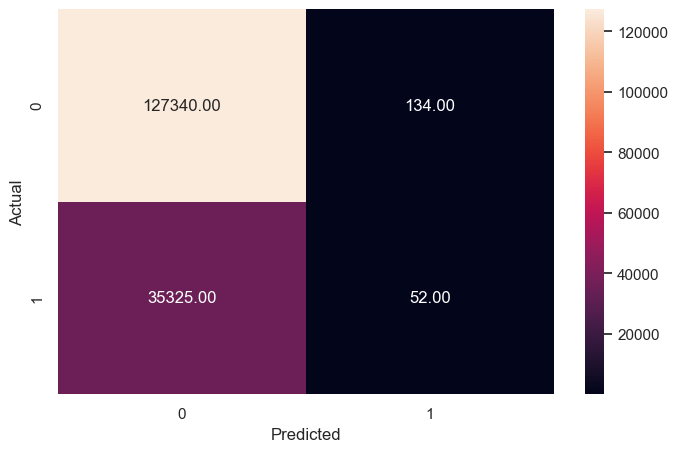

In [39]:
pred_train_dt = modeloRegresion.predict(X_train)
metrics_score(y_train, pred_train_dt)

Precision: Alta para la clase 0 (78%) pero baja para la clase 1 (28%), lo que indica que las predicciones positivas para la clase 1 tienen muchos falsos positivos.
Recall (sensibilidad): Muy bajo para la clase 1 (0%), lo que indica que el modelo identifica muy pocos de los verdaderos positivos en comparación con la cantidad total.
F1-score: Es un promedio ponderado de precision y recall, y es bajo para la clase 1 (0%), reflejando un desequilibrio entre precision y recall para la clase minoritaria.
La accuracy general es del 78%, sin embargo, está sesgada por la clase dominante (0) debido a su mayor número de muestras.
Esto sugiere que el modelo tiene dificultades para predecir la clase 1 de manera precisa y con buen recall.

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54632
           1       0.34      0.00      0.00     15162

    accuracy                           0.78     69794
   macro avg       0.56      0.50      0.44     69794
weighted avg       0.69      0.78      0.69     69794



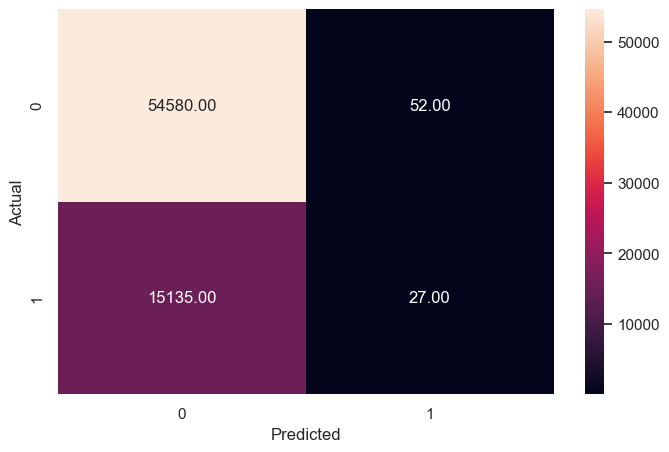

In [40]:
pred_test_dt = modeloRegresion.predict(X_test)
metrics_score(y_test, pred_test_dt)

Precision: Es alta para la clase 0 (78%) pero baja para la clase 1 (34%), lo que indica que las predicciones positivas para la clase 1 tienen una proporción considerable de falsos positivos.
Recall (sensibilidad): Es muy bajo para la clase 1 (0%), lo que sugiere que el modelo identifica muy pocos de los verdaderos positivos en comparación con la cantidad total.
F1-score: Es bajo para la clase 1 (0%), lo que refleja un desequilibrio entre precision y recall para la clase minoritaria.
La accuracy general es del 78%, pero está sesgada por la clase dominante (0) debido a su mayor cantidad de muestras.
Esto sugiere que el modelo tiene dificultades para predecir la clase 1 de manera precisa y con buen recall.

BDT2-5 - BDT2-26 https://alkemy-labs.atlassian.net/browse/BDT2-26

# Modeling III: Arboles de desicion
COMO DS DEVELOPER, QUIERO implementar un modelo de machin learning PARA predecir la clase a la cual pertenece un data point

Criterios de aceptación:

- Realizar el entrenamiento del modelo Desition Tree classifier
- Procesar los datos de test utilizando el pipeline creado previamente
- Hacer predicciones sobre los datos normalizados

- El funcionamiento del decisionTree se basa en dividir el conjunto de datos en subconjuntos más pequeños de acuerdo con las características más relevantes. Cada división se realiza de manera que maximice la pureza en los nodos hoja. La pureza se mide utilizando métricas como la ganancia de información o la impureza de Gin

In [14]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    127474
           1       0.99      0.93      0.96     35377

    accuracy                           0.98    162851
   macro avg       0.99      0.96      0.97    162851
weighted avg       0.98      0.98      0.98    162851



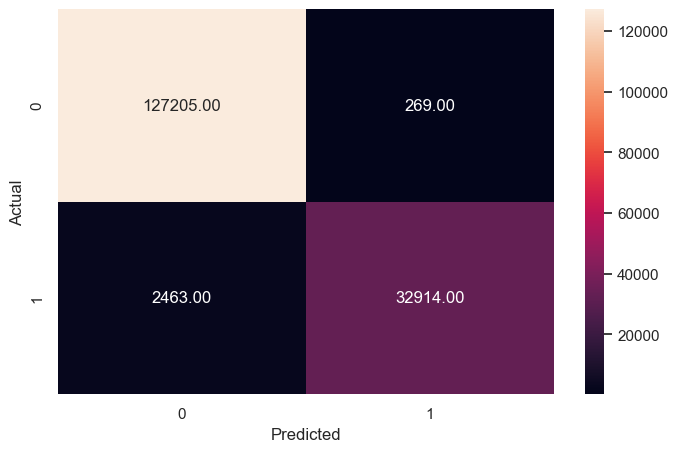

In [15]:
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

- El modelo decisionTree presenta sobre-ajuste en el apartado de train dando valores por encima del 0.9
- El modelo se espera que tenga una perdida en su eficiencia en el test por esta muestra de sobreajusta.

## Mejoras a seguir
Se decide probar mejoras en el modelo en base a las siguientes medidas:
- max_depth
- max_leaf_nodes
- min_samples_split

Con estas se decide controlar la profundidad del arbol, limitar el numero total de nodos y la cantidad minima que debe caer en cada nodo. Con esto se trata el sobreajuste y ver optimizacion en las clasificaciones.


              precision    recall  f1-score   support

           0       0.79      0.79      0.79     54632
           1       0.24      0.24      0.24     15162

    accuracy                           0.67     69794
   macro avg       0.52      0.52      0.52     69794
weighted avg       0.67      0.67      0.67     69794



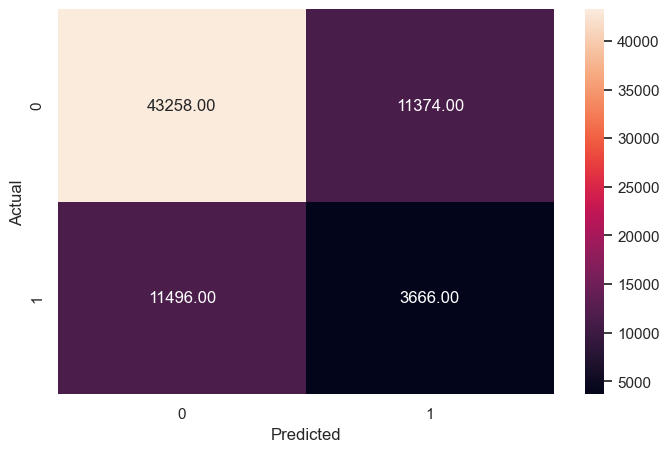

In [16]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

- El modelo tiene tendencia a predecir mas valores 0 que 1
- Existe un bajo recall para los valores 1 dejando en 0.24
- a pesar de que el accuracy es 0.67 se muestra que es solo porque existe mayor cantidad de 0 en el modelo y no porque separe bien los valores.


In [17]:
estimator = DecisionTreeClassifier(random_state=1)

parameters = {
    "max_depth": np.arange(2, 12, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

grid_obj = GridSearchCV(estimator, parameters, cv=7,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=250, min_samples_split=50,
                       random_state=1)

- Se indican los parametros para hacer ajuste al modelo, se usan valores bajos en un inicio para revisar el sobreajuste para el modelo
- se agregan parametros para que busque el optimo en verdaderos positivos con el scoring = 'recall'

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    127474
           1       0.71      0.01      0.03     35377

    accuracy                           0.78    162851
   macro avg       0.75      0.51      0.45    162851
weighted avg       0.77      0.78      0.69    162851



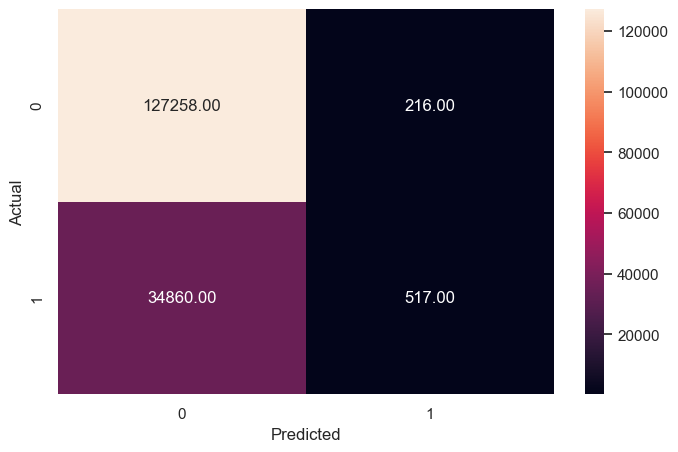

In [18]:
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54632
           1       0.28      0.01      0.01     15162

    accuracy                           0.78     69794
   macro avg       0.53      0.50      0.44     69794
weighted avg       0.67      0.78      0.69     69794



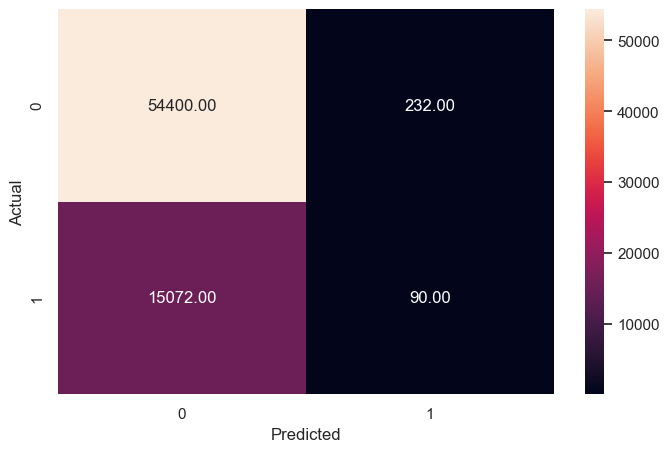

In [19]:
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

- Se presenta una tendencia a valores 0, el modelo no puede diferenciar claramente los valores 1
- Se indica un mejor tratamiento para los datos entregados podria dar mejores resultados al modelo
- Un arbol mas complejo como se mostro en el primer intento ayudaria a que el modelo pudiera diferenciar mejor los valores

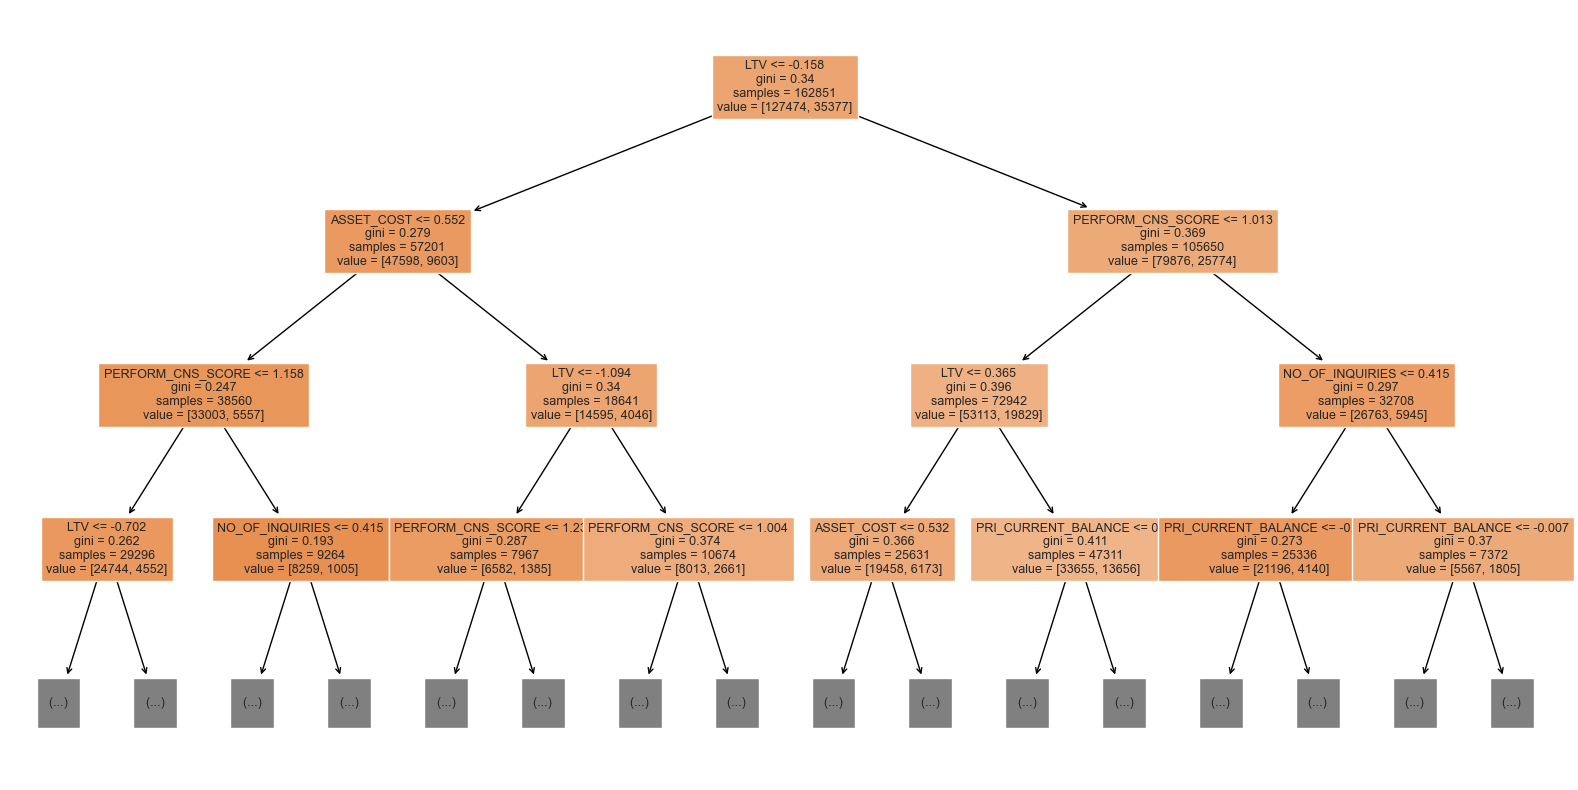

In [20]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

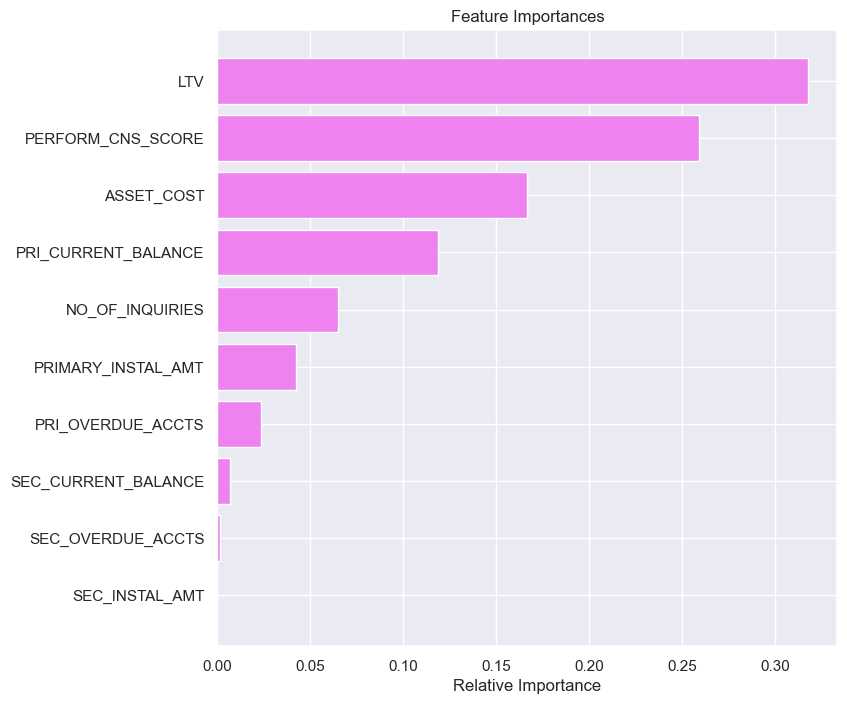

In [21]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# XGboost

XGboost es un algoritmo de aprendizaje automático basado en la técnica de ensamblado Gradient Boosting. Utiliza árboles de decisión como modelos base y se destaca por su eficiencia, escalabilidad y capacidad para manejar regularización. La función objetivo de XGBoost combina términos de pérdida y regularización para optimizar el modelo de manera que minimice errores y evite sobreajuste

In [22]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    127474
           1       0.91      0.02      0.04     35377

    accuracy                           0.79    162851
   macro avg       0.85      0.51      0.46    162851
weighted avg       0.81      0.79      0.70    162851



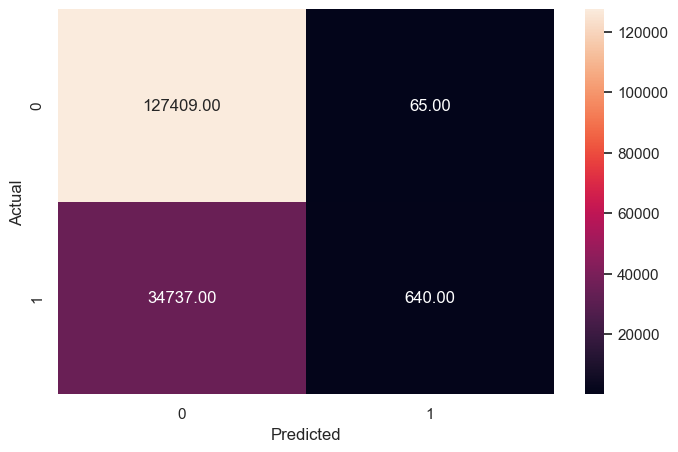

In [23]:
pred_train_dt = xgb_classifier.predict(X_train)
metrics_score(y_train, pred_train_dt)

- Se muestra que el modelo tiende a considerar muy pocos como valores 1, en su mayoria esta entregando clasificaciones 0 para el conjunto de datos
- A pesar de tener un Accuracy de 0.79 esto sigue siendo un mal modelo ya que no separa bien el conjunto de clasificados.

## Mejoras a seguir

- se sugiera ajustar el numero de estimadores para hacer el arbol mas complejo y poder diferenciar mejor entre 0 y 1
- se sugiere ajustar la escala ya que los datos estan desequilibrados, eso daria mas importancia a una clase que a otra
- mejorar el learning_rate para hacer prevencion de sobreajuste

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54632
           1       0.35      0.01      0.01     15162

    accuracy                           0.78     69794
   macro avg       0.57      0.50      0.44     69794
weighted avg       0.69      0.78      0.69     69794



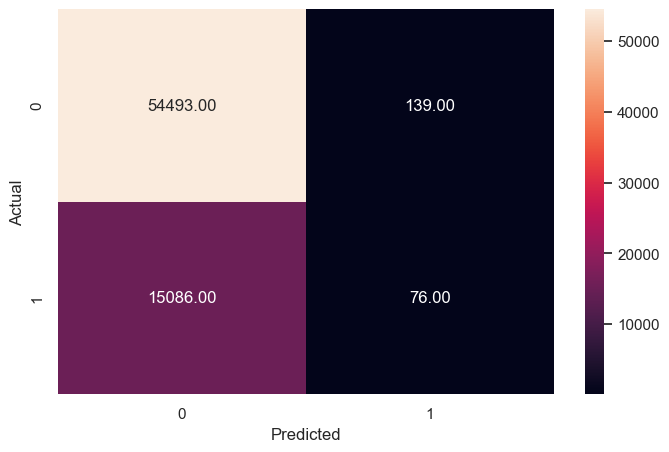

In [24]:
pred_test_dt = xgb_classifier.predict(X_test)
metrics_score(y_test, pred_test_dt)

In [25]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

              precision    recall  f1-score   support

           0       0.89      0.35      0.50    127474
           1       0.27      0.85      0.41     35377

    accuracy                           0.46    162851
   macro avg       0.58      0.60      0.45    162851
weighted avg       0.76      0.46      0.48    162851



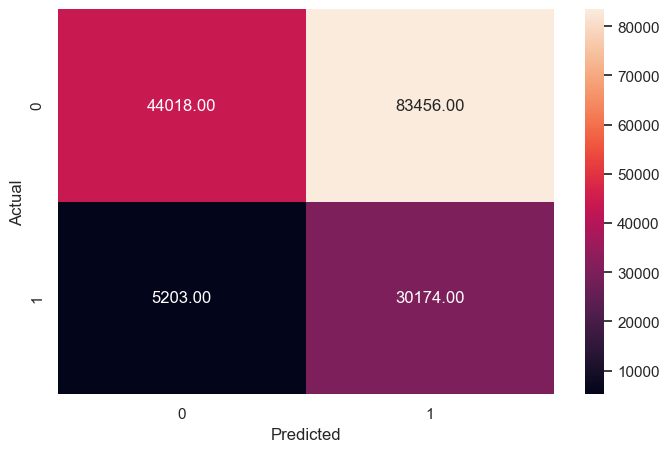

In [26]:
pred_train_dt = xgb_tuned.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.87      0.33      0.48     54632
           1       0.25      0.82      0.39     15162

    accuracy                           0.44     69794
   macro avg       0.56      0.58      0.43     69794
weighted avg       0.73      0.44      0.46     69794



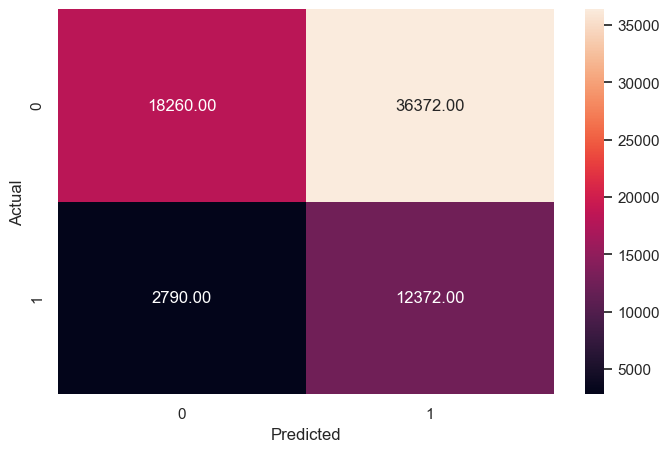

In [27]:
pred_test_dt = xgb_tuned.predict(X_test)
metrics_score(y_test, pred_test_dt)